In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report

In [2]:
cols =["circle_id","loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou","std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8","std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8",
      "fb_user_6","fb_user_7","fb_user_8","night_pck_user_6","night_pck_user_7","night_pck_user_8","arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_2g_6","arpu_2g_7","arpu_2g_8",
      "av_rech_amt_data_8","av_rech_amt_data_7","av_rech_amt_data_6","count_rech_3g_8","count_rech_3g_7","count_rech_3g_6","count_rech_2g_8","count_rech_2g_7","count_rech_2g_6",
      "max_rech_data_8","max_rech_data_7","max_rech_data_6","total_rech_data_8","total_rech_data_7","total_rech_data_6","date_of_last_rech_data_8","date_of_last_rech_data_7","date_of_last_rech_data_6",
      "last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8", "id", "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]

columns_to_use= ['total_ic_mou_8', 'vol_2g_mb_8', 'arpu_8', 'roam_og_mou_8',
       'last_day_rch_amt_8', 'std_og_mou_7', 'loc_ic_t2m_mou_8',
       'total_ic_mou_6', 'arpu_7', 'aon', 'total_og_mou_8',
       'total_rech_amt_8', 'vol_3g_mb_8', 'total_rech_num_8',
       'loc_ic_mou_8', 'total_rech_num_7', 'total_ic_mou_7',
       'roam_og_mou_7', 'loc_ic_mou_7', 'roam_ic_mou_8', 'std_ic_mou_7',
       'aug_vbc_3g', 'total_og_mou_6', 'loc_og_t2f_mou_8',
       'max_rech_amt_8', 'max_rech_amt_6', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_6', 'last_day_rch_amt_7', 'isd_og_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_mou_7', 'jul_vbc_3g', 'std_ic_mou_6',
       'loc_og_t2f_mou_7', 'churn_probability']

In [3]:
from fast_ml.model_development import train_valid_test_split

raw_data= pd.read_csv("train.csv")
data= raw_data.loc[:, ~raw_data.columns.isin(cols)]

In [4]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(data)
impute_data= pd.DataFrame(imp_mean.transform(data))
impute_data.columns= data.columns

In [5]:
impute_data= impute_data.loc[:, impute_data.columns.isin(columns_to_use)]

In [6]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(impute_data, target = "churn_probability",
train_size=0.7, valid_size=0.2, test_size=0.1, random_state=5)

In [7]:
X_train= X_train.loc[:, ~X_train.columns.isin(["churn_probability"])]
X_valid= X_valid.loc[:, ~X_valid.columns.isin(["churn_probability"])]
X_test= X_test.loc[:, ~X_test.columns.isin(["churn_probability"])]

In [8]:
X_train.dropna()

,arpu_7,arpu_8,roam_ic_mou_8,roam_og_mou_7,roam_og_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_7,std_og_mou_7,...,total_rech_amt_8,max_rech_amt_6,max_rech_amt_8,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g
50431,44.160,164.759,1.83,49.36,5.48,0.00,0.00,0.00,0.00,0.00,...,186.0,36.0,130.0,0.0,130.0,0.00,0.0,1076.0,0.0,0.00
21088,57.893,66.787,0.00,0.00,0.00,0.00,0.00,0.00,8.31,46.46,...,60.0,30.0,30.0,30.0,0.0,0.00,0.0,514.0,0.0,0.00
29540,512.489,141.696,0.00,0.00,0.00,0.00,0.00,0.00,107.78,493.91,...,166.0,68.0,116.0,225.0,116.0,0.00,0.0,244.0,0.0,0.00
39514,339.824,370.292,0.00,0.00,0.00,0.56,62.46,72.96,198.01,77.14,...,398.0,229.0,398.0,339.0,398.0,0.00,0.0,759.0,0.0,20.16
63608,512.826,407.659,0.00,21.74,0.00,6.44,7.71,0.00,258.08,0.00,...,472.0,65.0,62.0,30.0,30.0,0.00,0.0,356.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59465,388.837,310.270,0.00,0.00,0.00,0.00,0.00,0.00,20.11,512.54,...,342.0,110.0,144.0,36.0,0.0,146.04,0.0,1188.0,0.0,0.00
5520,256.778,279.315,86.08,4.79,95.59,0.00,5.13,1.56,63.66,201.33,...,319.0,128.0,169.0,120.0,169.0,0.00,0.0,3034.0,0.0,0.00
20463,185.459,188.832,0.00,0.00,0.00,2.58,1.75,0.20,218.79,2.39,...,260.0,120.0,130.0,110.0,130.0,0.00,0.0,2226.0,0.0,0.00
18638,207.521,272.111,0.00,0.00,0.00,0.96,0.08,0.18,106.88,0.00,...,310.0,50.0,30.0,30.0,10.0,0.00,0.0,3112.0,0.0,0.00


## Adaboost with rfe

In [9]:
from sklearn.ensemble import AdaBoostClassifier
import time

In [11]:
for i in range(4, 7, 2):
    decision_clf= DecisionTreeClassifier(max_depth= i)
    clf = AdaBoostClassifier(decision_clf, n_estimators=150, learning_rate= 0.046)
    startTime= time.time()
    clf.fit(X_train, y_train)
    executionTime = (time.time() - startTime)
    print('Execution time in seconds: ' + str(executionTime))
    print("*"*100)
    print(i)
    print("Train")
    print(accuracy_score(y_train, clf.predict(X_train)))
    print(confusion_matrix(y_train, clf.predict(X_train)))
    print("Validation")
    print(accuracy_score(y_valid, clf.predict(X_valid)))
    print(confusion_matrix(y_valid, clf.predict(X_valid)))
    print("Test")
    print(accuracy_score(y_test, clf.predict(X_test)))
    print(confusion_matrix(y_test, clf.predict(X_test)))
    print(classification_report(y_test, clf.predict(X_test)))

Execution time in seconds: 67.77529406547546
****************************************************************************************************
4
Train
0.9436315026837282
[[43045   924]
 [ 1838  3192]]
Validation
0.9452142857142857
[[12308   258]
 [  509   925]]
Test
0.9444285714285714
[[6185  147]
 [ 242  426]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      6332
         1.0       0.74      0.64      0.69       668

    accuracy                           0.94      7000
   macro avg       0.85      0.81      0.83      7000
weighted avg       0.94      0.94      0.94      7000

Execution time in seconds: 103.3995463848114
****************************************************************************************************
6
Train
0.9601624522949448
[[43205   764]
 [ 1188  3842]]
Validation
0.9434285714285714
[[12298   268]
 [  524   910]]
Test
0.9442857142857143
[[6181  151]
 [ 239  429]]
              precision    recall  f1-sco

In [11]:
for i in range(1, 15):
    clf= DecisionTreeClassifier(max_depth= i)
    startTime= time.time()
    clf.fit(X_train, y_train)
    executionTime = (time.time() - startTime)
    print('Execution time in seconds: ' + str(executionTime))
    print("*"*100)
    print(i)
    print("Train")
    print(accuracy_score(y_train, clf.predict(X_train)))
    print(confusion_matrix(y_train, clf.predict(X_train)))
    print("Validation")
    print(accuracy_score(y_valid, clf.predict(X_valid)))
    print(confusion_matrix(y_valid, clf.predict(X_valid)))
    print("Test")
    print(accuracy_score(y_test, clf.predict(X_test)))
    print(confusion_matrix(y_test, clf.predict(X_test)))

Execution time in seconds: 0.12799549102783203
****************************************************************************************************
1
Train
0.9345496846874426
[[42618  1351]
 [ 1856  3174]]
Validation
0.9384285714285714
[[12206   360]
 [  502   932]]
Test
0.9377142857142857
[[6123  209]
 [ 227  441]]
Execution time in seconds: 0.2200026512145996
****************************************************************************************************
2
Train
0.9388150778587319
[[42907  1062]
 [ 1936  3094]]
Validation
0.9425714285714286
[[12286   280]
 [  524   910]]
Test
0.9424285714285714
[[6167  165]
 [ 238  430]]
Execution time in seconds: 0.3270430564880371
****************************************************************************************************
3
Train
0.9388150778587319
[[42907  1062]
 [ 1936  3094]]
Validation
0.9425714285714286
[[12286   280]
 [  524   910]]
Test
0.9424285714285714
[[6167  165]
 [ 238  430]]
Execution time in seconds: 0.4430046081542969
**

In [39]:
clf= DecisionTreeClassifier(max_depth= 6, min_samples_split= 200)
startTime= time.time()
clf.fit(X_train, y_train)
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))
print("*"*100)
print(6)
print("Train")
y_pred= clf.predict(X_train)
print(accuracy_score(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("Validation")
y_pred= clf.predict(X_valid)
print(accuracy_score(y_valid,y_pred))
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))
print("Test")
y_pred= clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Execution time in seconds: 0.6359987258911133
****************************************************************************************************
6
Train
0.9418967734035388
[[42980   989]
 [ 1858  3172]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     43969
         1.0       0.76      0.63      0.69      5030

    accuracy                           0.94     48999
   macro avg       0.86      0.80      0.83     48999
weighted avg       0.94      0.94      0.94     48999

Validation
0.9455
[[12303   263]
 [  500   934]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     12566
         1.0       0.78      0.65      0.71      1434

    accuracy                           0.95     14000
   macro avg       0.87      0.82      0.84     14000
weighted avg       0.94      0.95      0.94     14000

Test
0.9437142857142857
[[6174  158]
 [ 236  432]]
              precision    recall  f1-sco

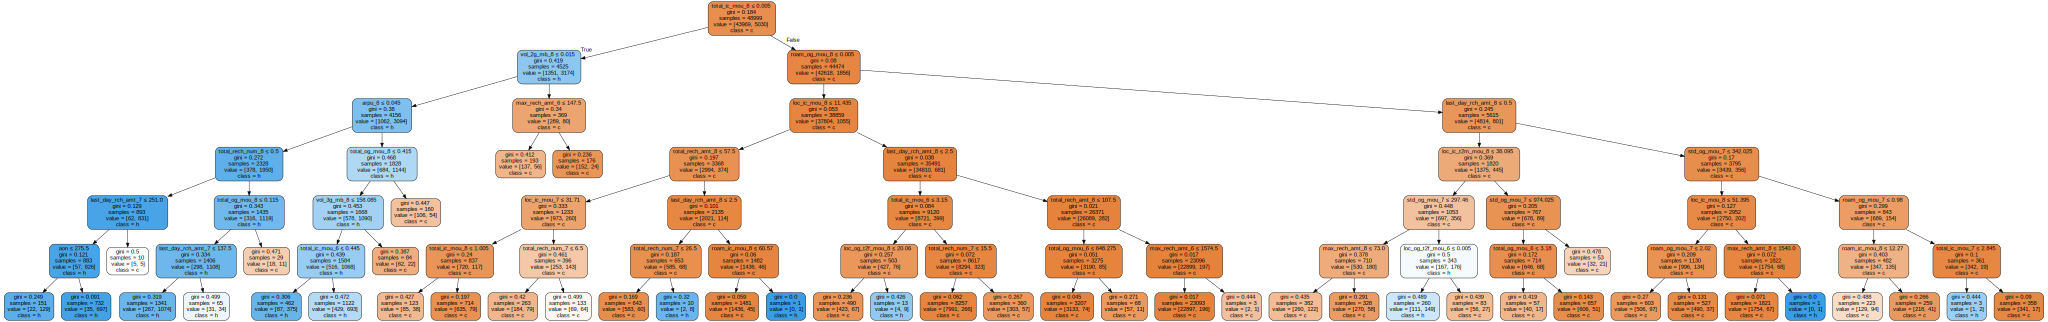

In [40]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf,
                                out_file=None, 
                      feature_names=X_train.columns,  
                      class_names='churn',  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

## Adaboost without rfe

In [12]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(data)
impute_data= pd.DataFrame(imp_mean.transform(data))
impute_data.columns= data.columns

In [13]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(impute_data, target = "churn_probability",
train_size=0.7, valid_size=0.2, test_size=0.1, random_state=5)

X_train= X_train.loc[:, ~X_train.columns.isin(["churn_probability"])]
X_valid= X_valid.loc[:, ~X_valid.columns.isin(["churn_probability"])]
X_test= X_test.loc[:, ~X_test.columns.isin(["churn_probability"])]

In [14]:
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
50431,152.248,44.160,164.759,128.98,4.55,236.63,64.54,44.81,71.49,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,1076.0,0.0,0.00,0.0
21088,81.105,57.893,66.787,58.04,22.71,31.76,15.83,32.06,34.46,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,514.0,0.0,0.00,0.0
29540,33.728,512.489,141.696,0.75,304.76,231.54,3.83,316.56,319.89,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,244.0,0.0,0.00,0.0
39514,272.667,339.824,370.292,43.01,64.26,22.89,161.59,210.89,199.81,18.44,...,0.0,0.0,0.0,0.0,0.0,0.0,759.0,0.0,20.16,0.0
63608,260.107,512.826,407.659,379.59,98.81,229.96,77.84,181.46,158.83,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,356.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59465,272.144,388.837,310.270,148.51,121.86,119.01,477.08,425.94,501.86,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1188.0,0.0,0.00,0.0
5520,313.370,256.778,279.315,76.86,43.94,25.01,325.34,225.84,143.46,19.28,...,0.0,0.0,0.0,0.0,0.0,0.0,3034.0,0.0,0.00,0.0
20463,300.984,185.459,188.832,22.78,14.24,27.93,337.13,206.94,195.29,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,2226.0,0.0,0.00,0.0
18638,282.335,207.521,272.111,9.99,2.38,12.94,121.64,105.64,100.33,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,3112.0,0.0,0.00,0.0


In [ ]:
for i in range(4, 5):
    decision_clf= DecisionTreeClassifier(max_depth= i)
    clf = AdaBoostClassifier(decision_clf, n_estimators=150, learning_rate= 0.046)
    startTime= time.time()
    clf.fit(X_train, y_train)
    executionTime = (time.time() - startTime)
    print('Execution time in seconds: ' + str(executionTime))
    print("*"*100)
    print(i)
    print("Train")
    print(accuracy_score(y_train, clf.predict(X_train)))
    print(confusion_matrix(y_train, clf.predict(X_train)))
    print("Validation")
    print(accuracy_score(y_valid, clf.predict(X_valid)))
    print(confusion_matrix(y_valid, clf.predict(X_valid)))
    print("Test")
    print(accuracy_score(y_test, clf.predict(X_test)))
    print(confusion_matrix(y_test, clf.predict(X_test)))

In [15]:
for i in range(1, 10):
    clf= DecisionTreeClassifier(max_depth= i)
    clf.fit(X_train, y_train)
    print("*"*100)
    print(i)
    print("Train")
    print(accuracy_score(y_train, clf.predict(X_train)))
    print(confusion_matrix(y_train, clf.predict(X_train)))
    print("Validation")
    print(accuracy_score(y_valid, clf.predict(X_valid)))
    print(confusion_matrix(y_valid, clf.predict(X_valid)))
    print("Test")
    print(accuracy_score(y_test, clf.predict(X_test)))
    print(confusion_matrix(y_test, clf.predict(X_test)))

****************************************************************************************************
1
Train
0.9345496846874426
[[42618  1351]
 [ 1856  3174]]
Validation
0.9384285714285714
[[12206   360]
 [  502   932]]
Test
0.9377142857142857
[[6123  209]
 [ 227  441]]
****************************************************************************************************
2
Train
0.9388150778587319
[[42907  1062]
 [ 1936  3094]]
Validation
0.9425714285714286
[[12286   280]
 [  524   910]]
Test
0.9424285714285714
[[6167  165]
 [ 238  430]]
****************************************************************************************************
3
Train
0.9388150778587319
[[42907  1062]
 [ 1936  3094]]
Validation
0.9425714285714286
[[12286   280]
 [  524   910]]
Test
0.9424285714285714
[[6167  165]
 [ 238  430]]
****************************************************************************************************
4
Train
0.9399987754852139
[[43011   958]
 [ 1982  3048]]
Validation
0.943214285714285